In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_grid(imgs, titles, rows, cols, figsize):
    fig, axs = plt.subplots(rows, cols, figsize=figsize) # Cria um grid para as imgs
    for a, i, t in zip(axs.flatten(), imgs, titles):
        # Adiciona uma imagem (i) na posição correta (a):
        a.imshow(i, cmap='gray', aspect='equal', interpolation=None, vmin=0, vmax=255)
        a.set_title(t)
    # Desativa o eixo das imagens (separado pois o número de imgs pode não preencher o grid):
    for a in axs.flatten(): a.set_axis_off()

    plt.tight_layout()
    plt.show()
    return fig, axs

In [3]:
ma = np.array([
[0, 0, 7],
[3, 5, 1]
]) / 16
mb = np.array([
[0,  0,  0,  0,  0,  32, 0],
[12, 0,  26, 0,  30, 0,  16],
[0,  12, 0,  26, 0,  12, 0],
[5,  0,  12, 0,  12, 0,  5]
]) / 200
mc = np.array([
[0, 0, 0, 8, 4],
[2, 4, 8, 4, 2]
]) / 32
md = np.array([
[0, 0, 0, 5, 3],
[2, 4, 5, 4, 2],
[0, 2, 3, 2, 0]
]) / 32
me = np.array([
[0, 0, 0, 8, 4],
[2, 4, 8, 4, 2],
[1, 2, 4, 2, 1]
]) / 42
mf = np.array([
[0, 0, 0, 7, 5],
[3, 5, 7, 5, 3],
[1, 3, 5, 3, 1]
]) / 48
masks = [ma, mb, mc, md, me, mf]

In [4]:
baboon = io.imread('./baboon.png')
monalisa = io.imread('./monalisa.png')
peppers = io.imread('./peppers.png')
watch = io.imread('./watch.png')
imgs = [baboon, monalisa, peppers, watch]

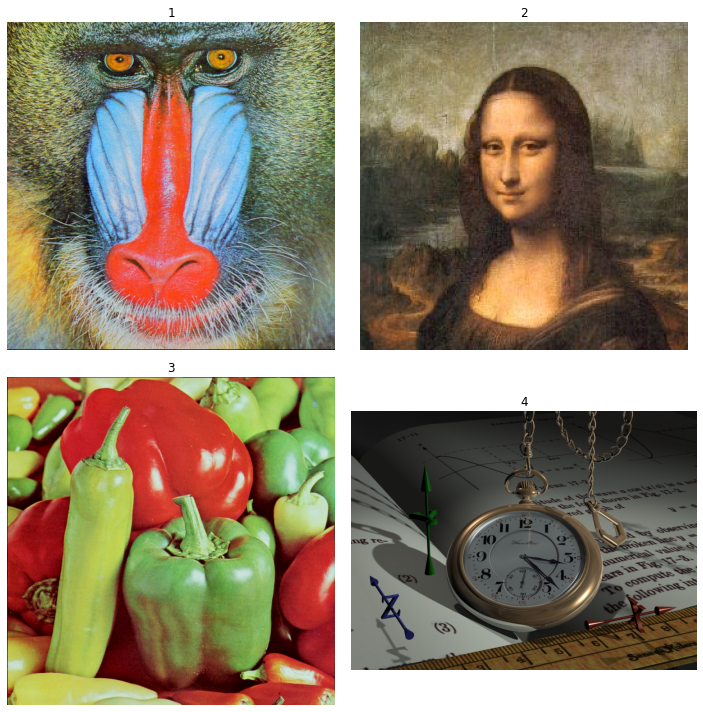

In [5]:
f1, axs1 = plot_grid(imgs, range(1, 5), 2, 2, (10, 10))


        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time elapsed: 45.3853s
[-20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3
  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275]


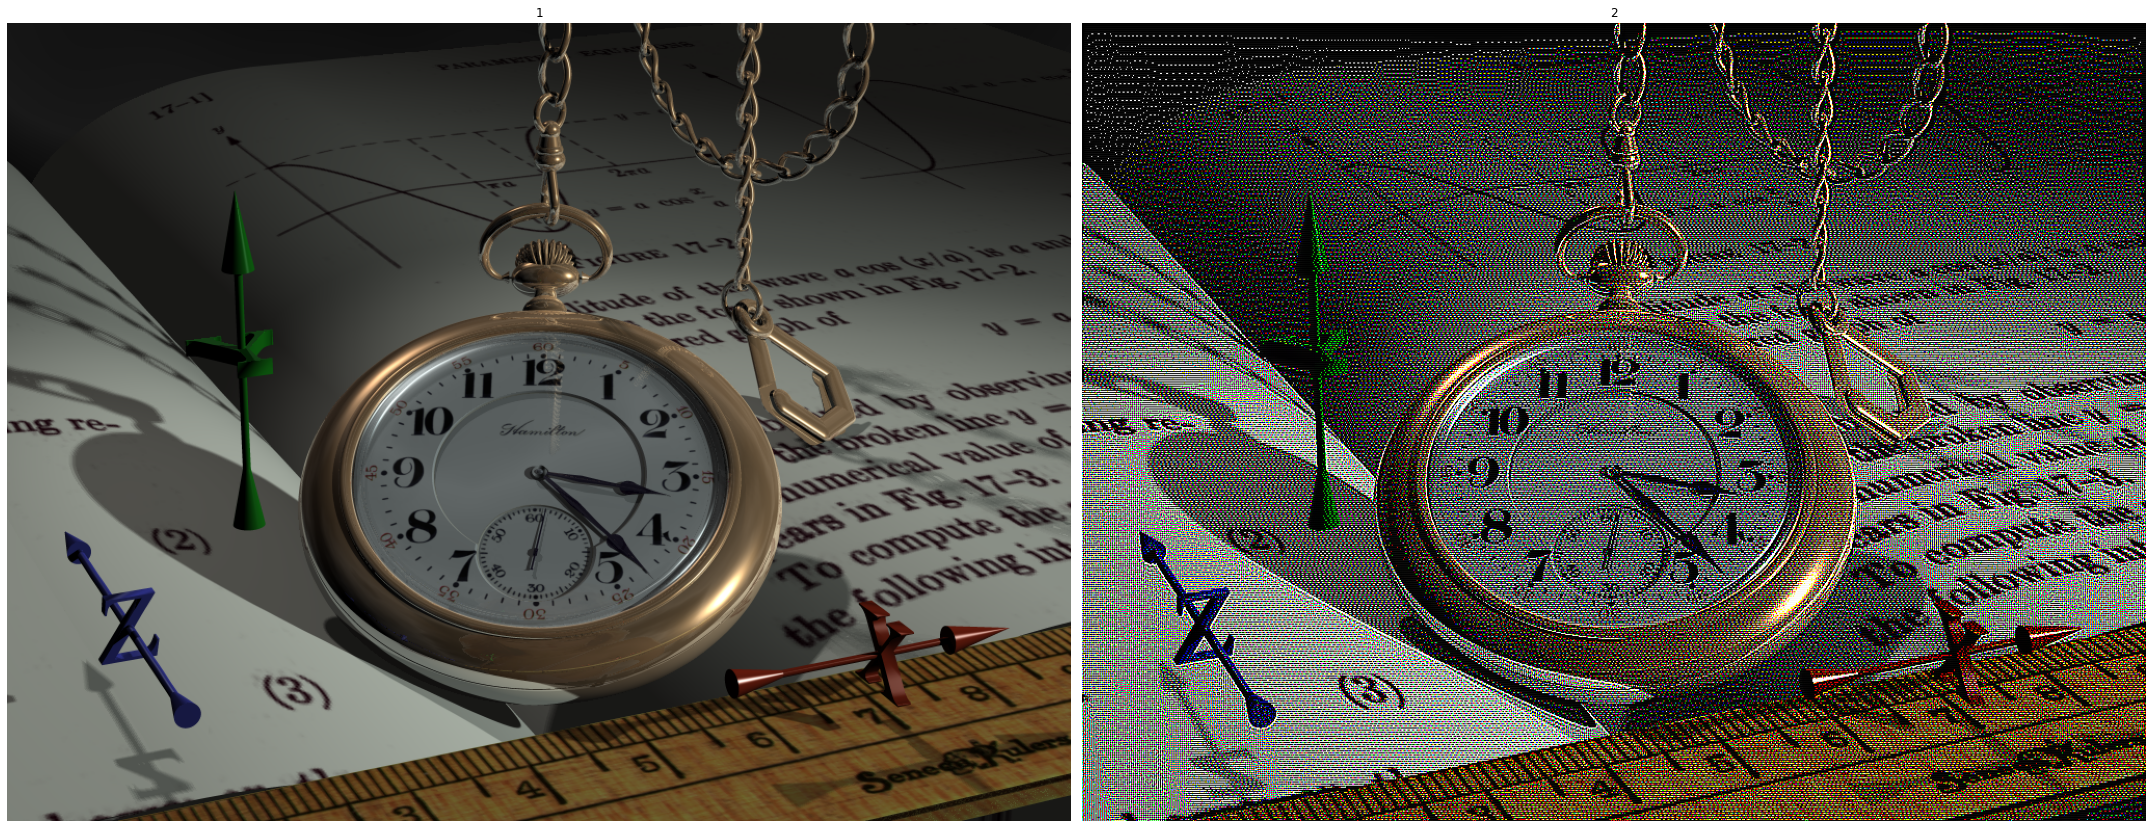

In [7]:
import time


def halftone(img, mask, sweep='linear', k=1):
    il, ic, _ = img.shape
    ml, mc = mask.shape
    resized = np.zeros((il + ml - 1, ic + mc - 1, 3), dtype=float)
    border = (mc - 1) // 2
    resized[0:il, border:ic + border] = img

    f0, f1 = k / 255, 255 / k
    norm_ran = range(border, ic + border)
    reve_ran = range(ic + border - 1, border - 1, -1)
    ran = norm_ran
    for i in range(0, il):
        for j in ran:
            pixel = np.copy(resized[i][j])
            newpixel = np.round(f1 * np.round(f0 * pixel))
            resized[i][j] = newpixel

            error = pixel.astype(float) - newpixel
            for c, e in enumerate(error): # distribute the error over each channel
                carry = e * mask
                resized[i:i + ml, (j - border):(j + border + 1), c] += carry
                
        if sweep == 'zigzag':
            ran = reve_ran if i % 2 == 0 else norm_ran # in the end of an even loop change to reverse
            np.flip(mask, 1) # flip the mask to match the next sweep 

    return resized[0:il, border:ic + border].astype(int)

start = time.time()
ht = halftone(watch, mb, 'zigzag')
end = time.time()
print("Time elapsed: {:.4f}s".format(end - start))

print(np.unique(ht))
f, axs = plot_grid([watch, ht], range(1, 3), 1, 2, (30, 30))